In [ ]:
import pandas as pd                                                #playing with data
import matplotlib.pyplot as plt                                    #for graph 
from matplotlib import style
style.use('ggplot')                                                #for dirrence 
%matplotlib inline                                                

import plotly
import plotly.express as px
import plotly.graph_objects as go                                  #use plotly in object oriented way
plt.rcParams['figure.figsize']=17,8

import cufflinks as cf                                             # use plotly with  pandas in more easier way
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot           #to work plotly in offline 

import folium                                                       # for maps

In [ ]:
#connect jupyter notebook with plotly 
pyo.init_notebook_mode(connected=True)
cf.go_offline()# use offline

In [ ]:
df=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\Covid cases in India.xlsx")

In [ ]:
df

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
df

In [ ]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [ ]:
df

In [ ]:
total_cases_overall=df['Total Cases'].sum()
print("The Total Number Of Cases Till Now In India:-",total_cases_overall)

In [ ]:
df['Total Active']=df['Total Cases']-df['Cured']

In [ ]:
df

In [12]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [13]:
Total_Active_cases=df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()

In [14]:
Total_Active_cases

,Total Active
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


In [15]:
Total_Active_cases.style.background_gradient(cmap='Reds')

,Total Active
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


# Graphical Representation

### pandas Visualisation

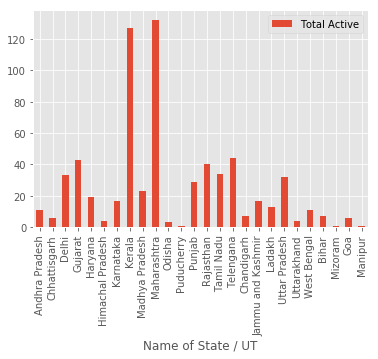

In [16]:
df.plot(kind='bar',x='Name of State / UT',y='Total Active')
plt.show()

### plotly

In [17]:
df.iplot(kind='bar',x='Name of State / UT',y='Total Active')

### Matplotlib Visulisation

<BarContainer object of 26 artists>

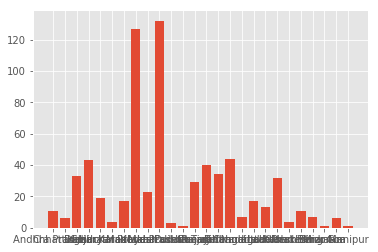

In [18]:
plt.bar(df['Name of State / UT'],df['Total Active'])

### plotly Express

In [19]:
px.bar(df,x='Name of State / UT',y='Total Active')

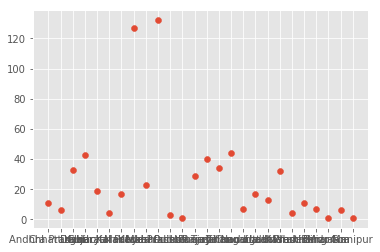

In [20]:
plt.scatter(df['Name of State / UT'],df['Total Active'])

In [21]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Active',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Active',colors='red',size=20)
px.scatter(df,x='Name of State / UT',y='Total Active')

## oo vis
### matplotlib

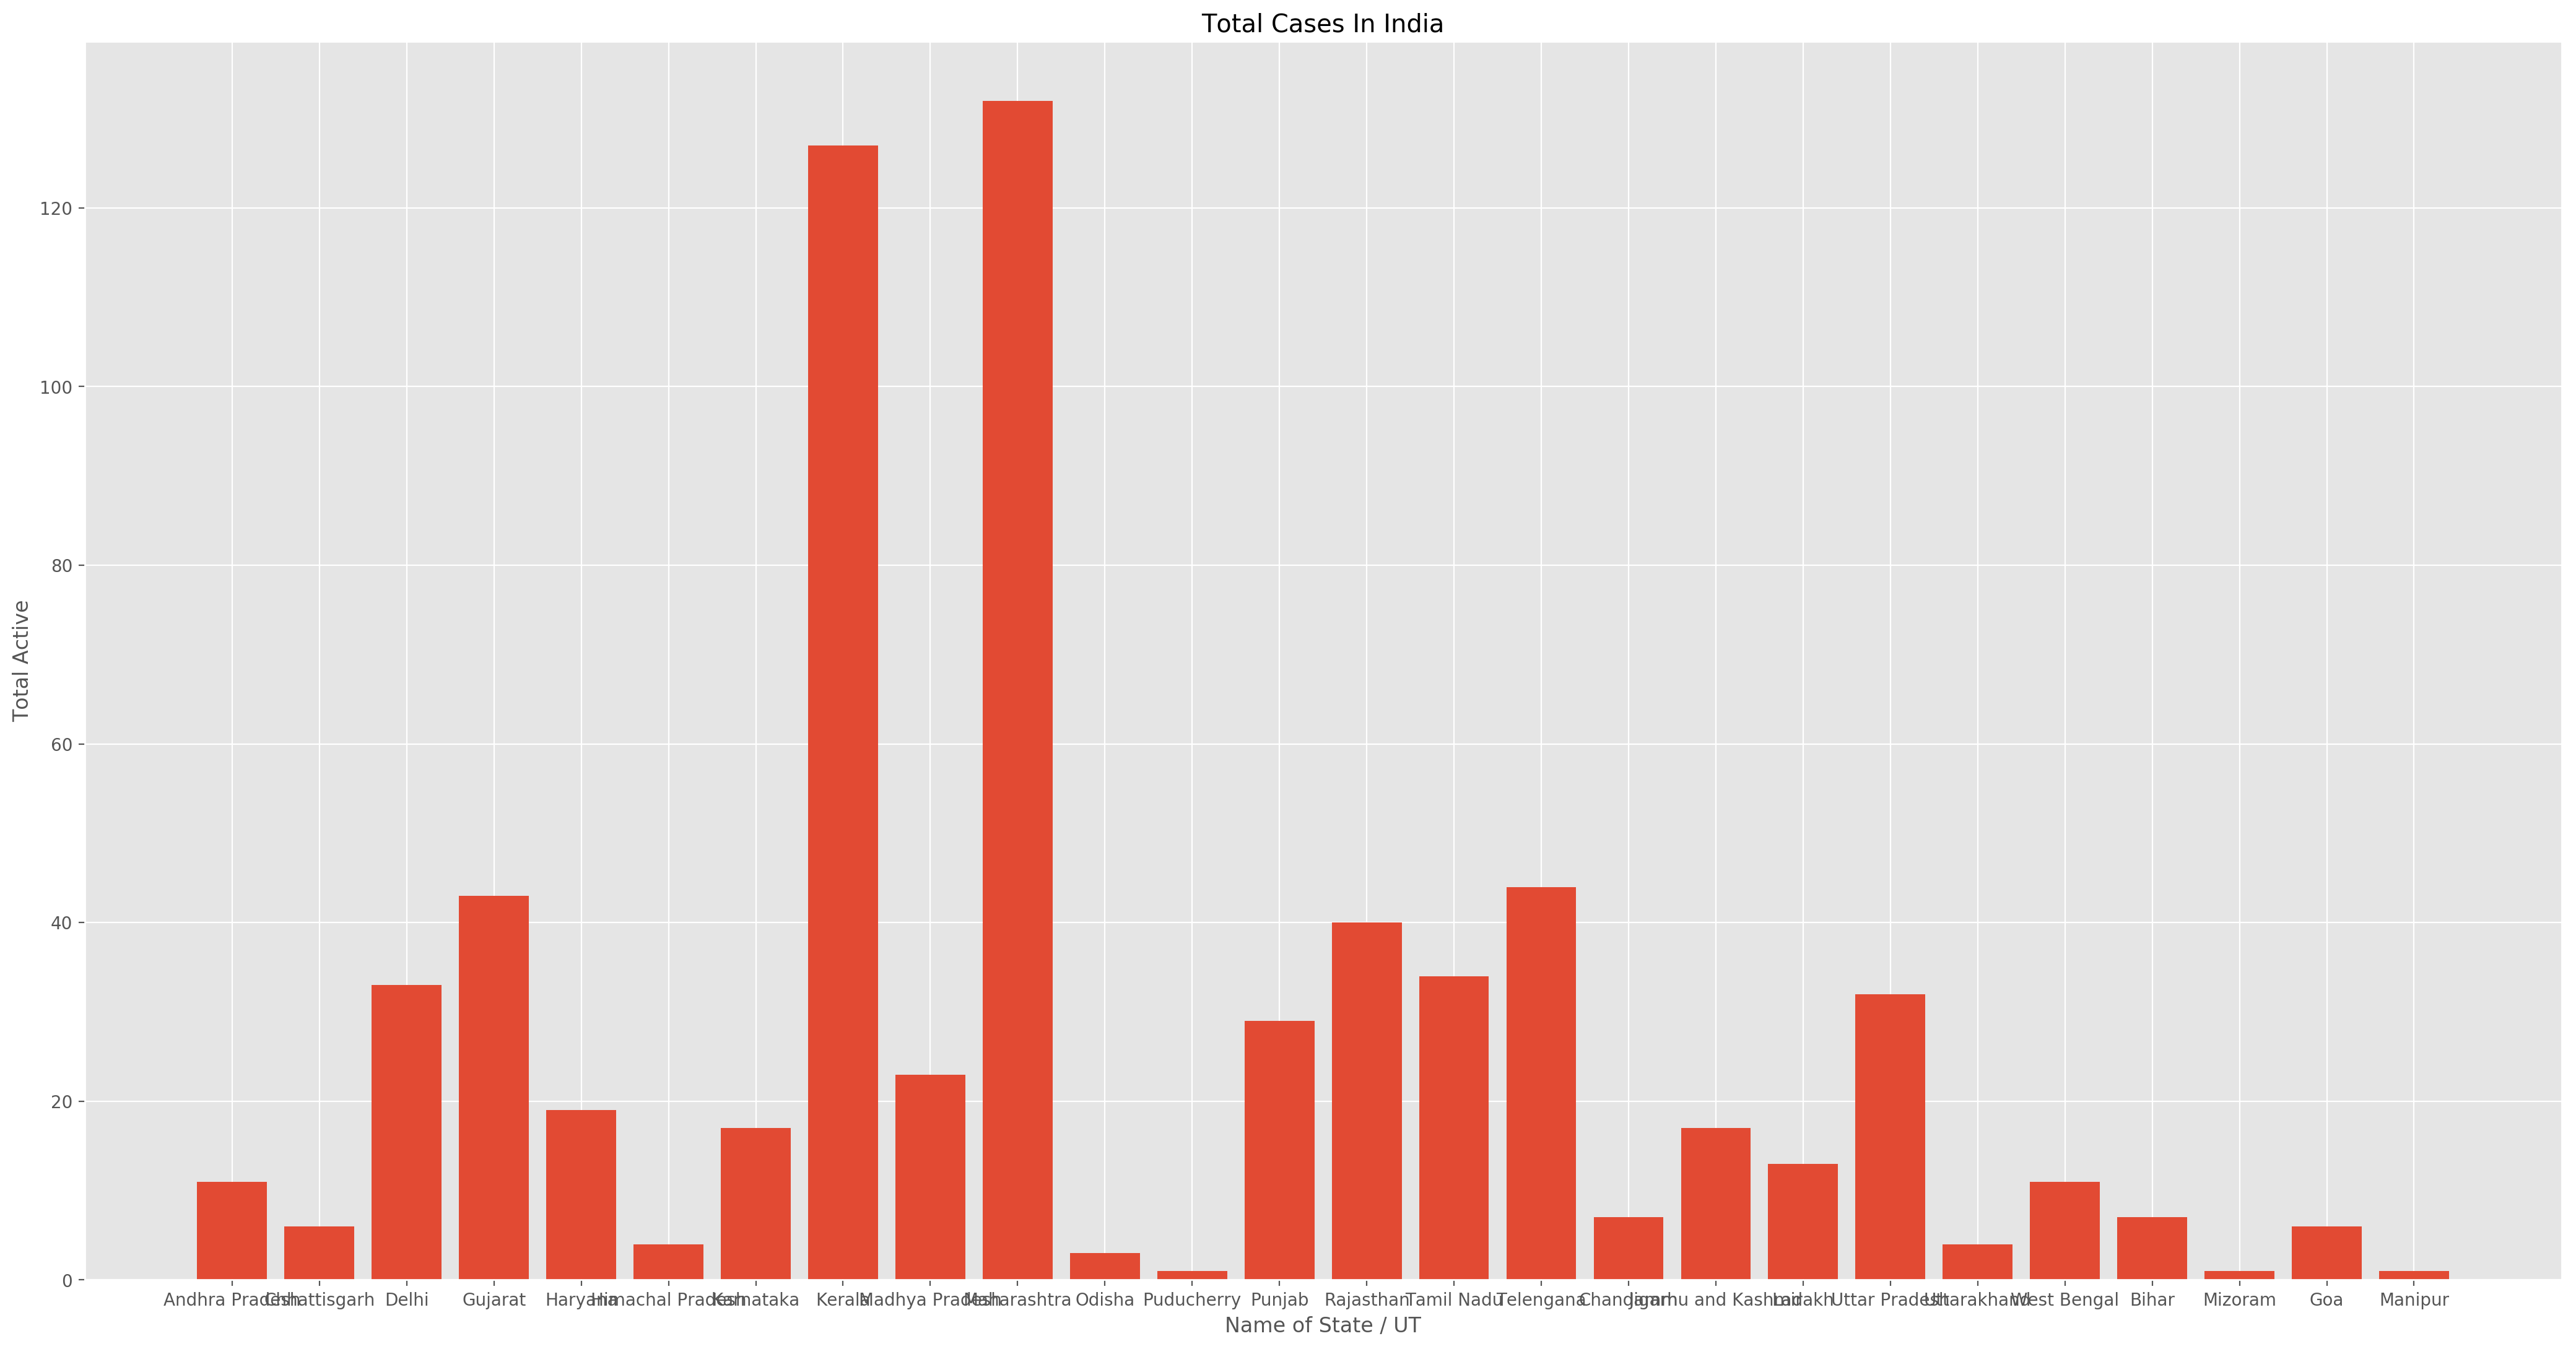

In [22]:
fig=plt.figure(dpi=200,figsize=(20,10))
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Active'])
axes.set_title('Total Cases In India')
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Active")
plt.show()
#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Active']))
fig.update_layout(title='Total Cases In India',xaxis=dict(title="Name of State / UT"),yaxis=dict(title="Total Active"))

In [23]:
Indian_cord=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\Indian Coordinates.xlsx")

In [24]:
Indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [25]:
df_full=pd.merge(Indian_cord,df,on='Name of State / UT')

In [26]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,33
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,17
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,132
6,Punjab,31.519974,75.980003,29,0,0,1,29,29
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,34


In [27]:
map=folium.Map(location=[20,70],zoon_start=4,titles='Stamenterrain')
for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Active'],df_full['Name of State / UT']):
     folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [28]:
map

# how Corona Virus Grow Globlly 

In [32]:
dbd_India=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\per_day_cases.xlsx",phase_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\per_day_cases.xlsx",phase_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\per_day_cases.xlsx",phase_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\per_day_cases.xlsx",phase_dates=True,sheet_name="Wuhan")


In [33]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


# matplotlib

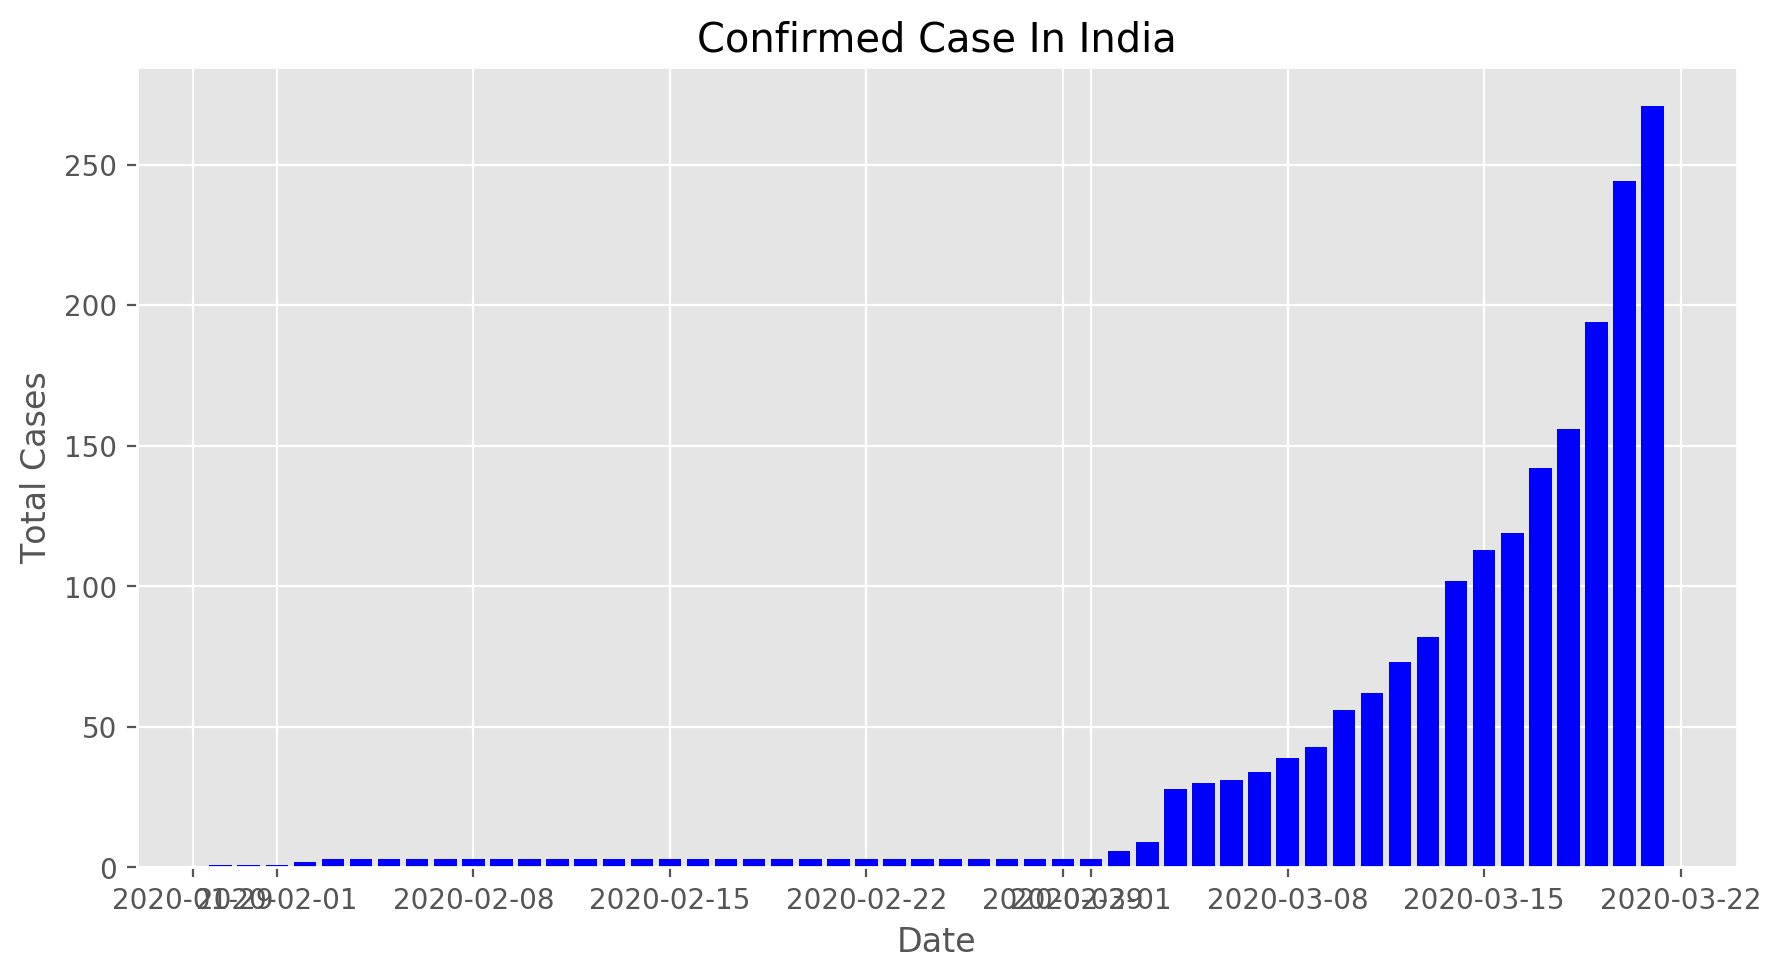

In [45]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India['Date'],dbd_India['Total Cases'],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Case In India")
plt.show()

# plotly Express

In [53]:
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in India")
fig.show()

In [54]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Italy")
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Korea")
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Wuhan")
fig.show()

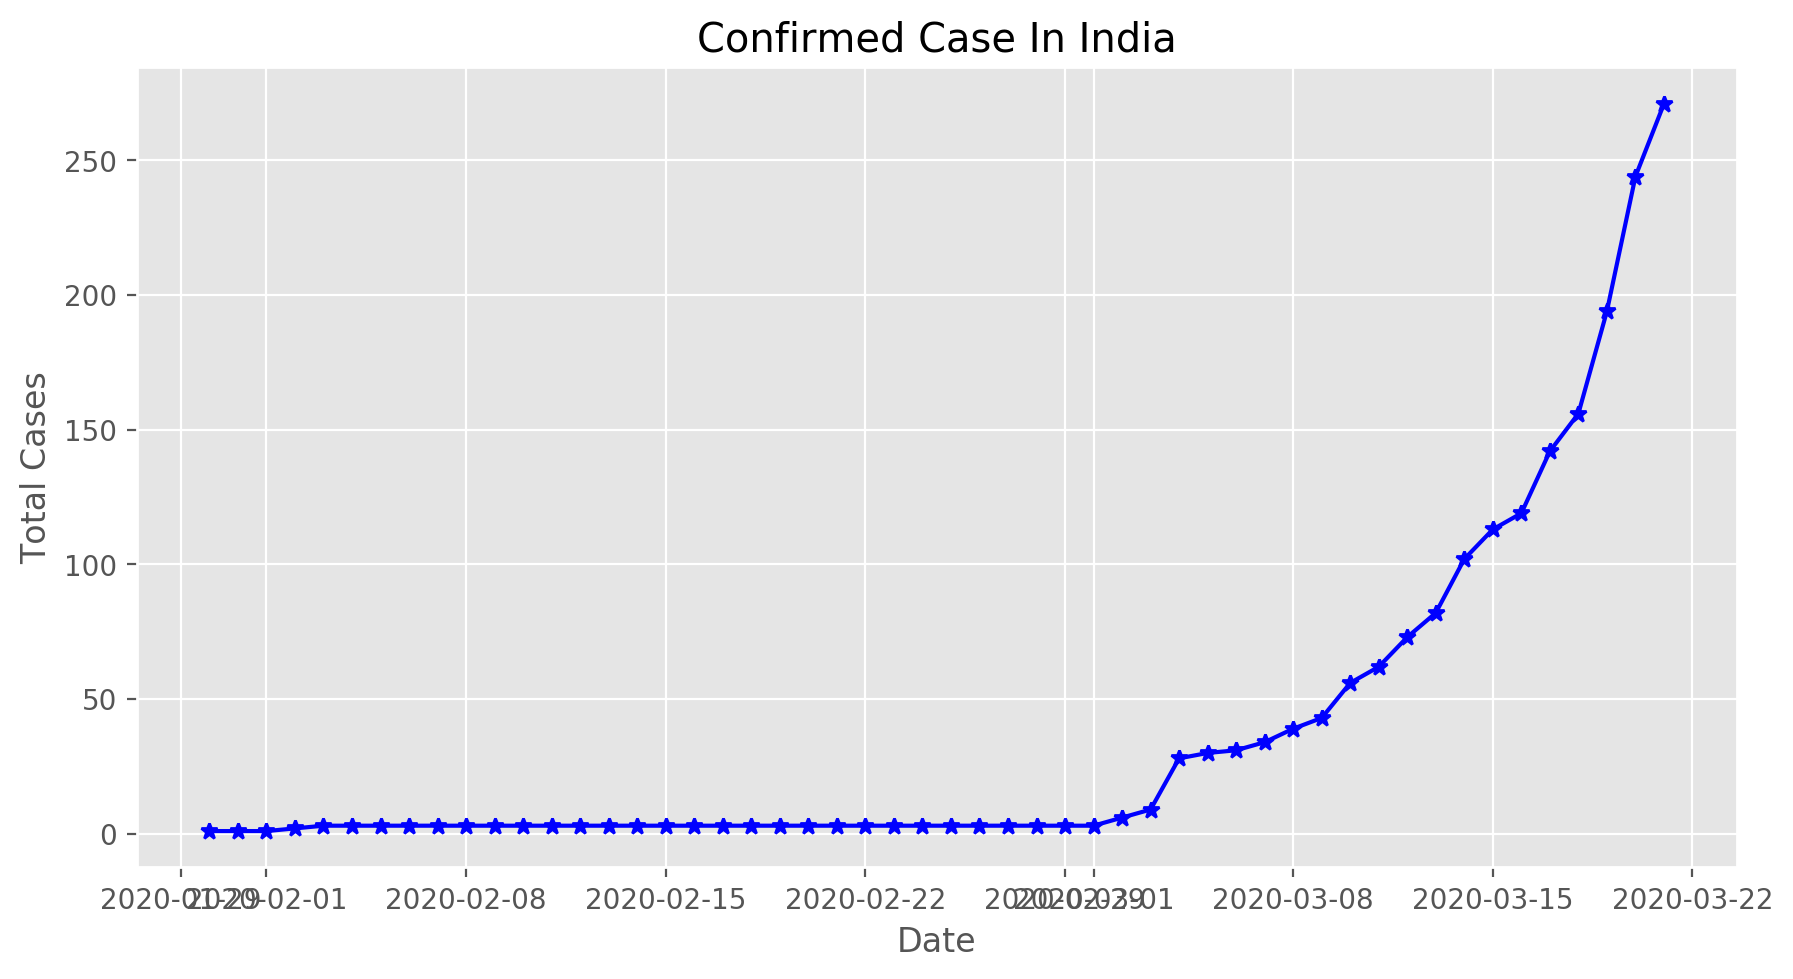

In [65]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India['Date'],dbd_India['Total Cases'],color='blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Case In India")
plt.show()

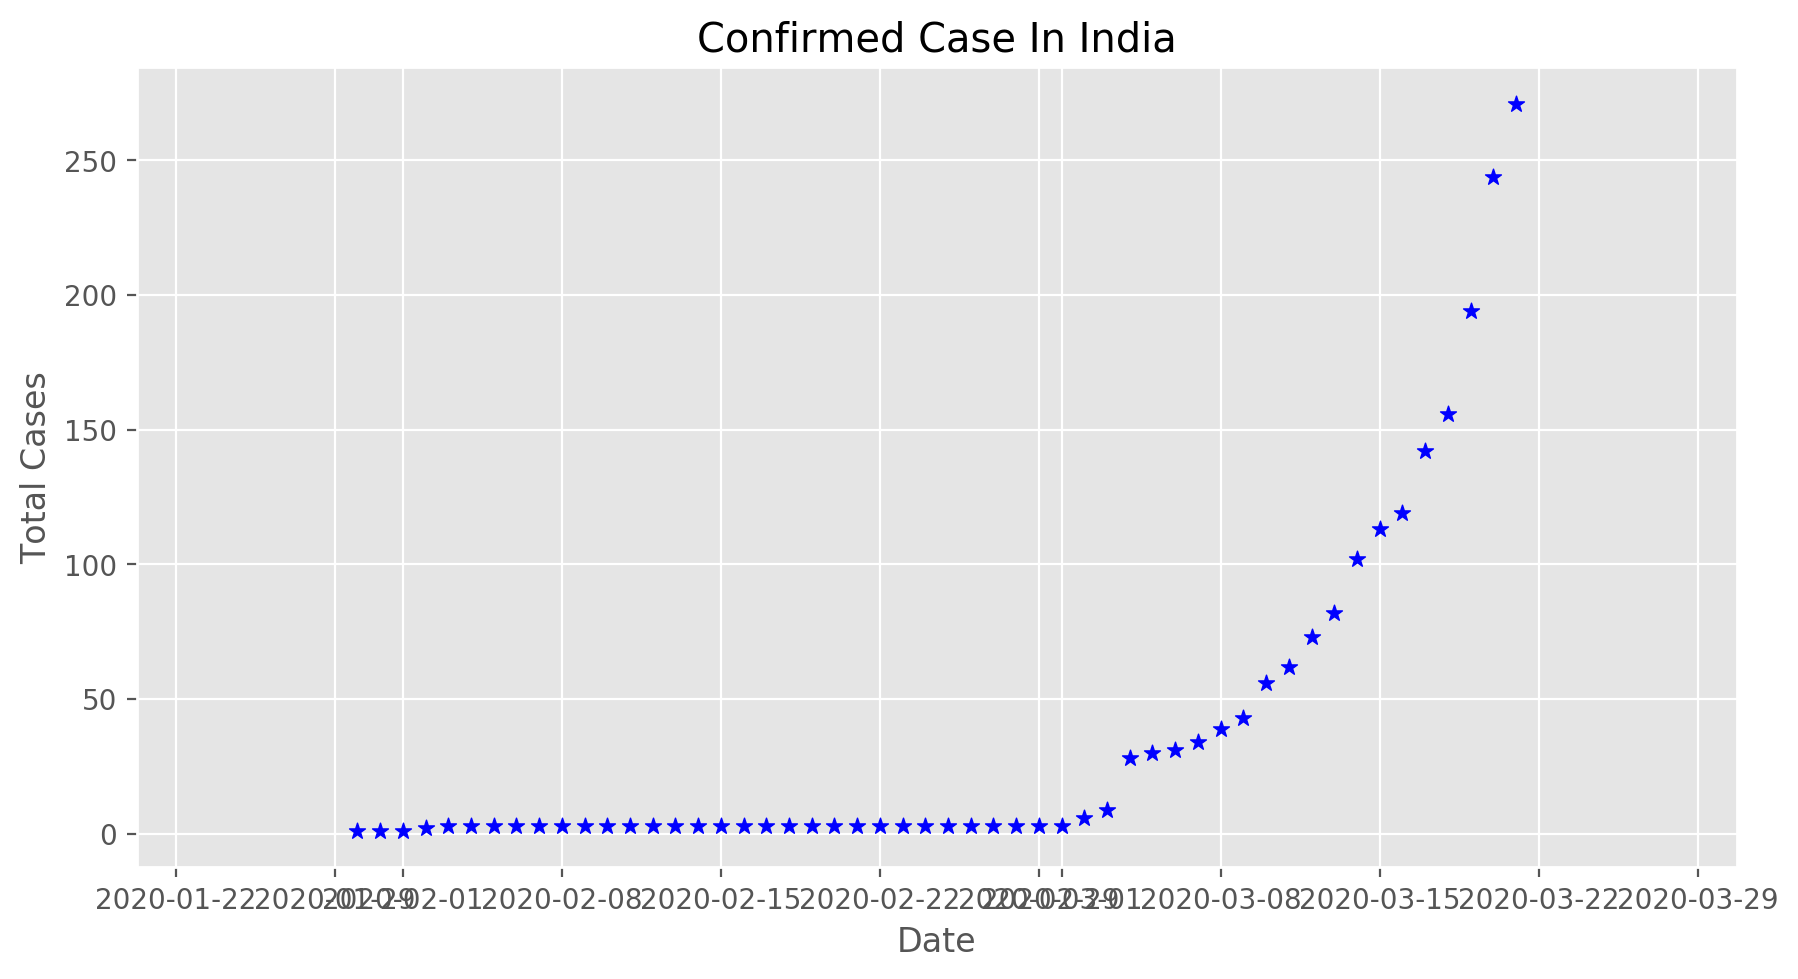

In [66]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_India['Date'],dbd_India['Total Cases'],color='blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Case In India")
plt.show()

In [58]:
fig=px.scatter(dbd_India,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in India")
fig.show()


In [60]:

fig=px.scatter(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Italy")
fig.show()



In [62]:
fig=px.scatter(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Korea")
fig.show()


In [63]:

fig=px.scatter(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title="Confirmed cases in Wuhan")
fig.show()

# plotly

In [69]:
dbd_India.iplot(kind='scatter',y='Total Cases',x='Date',mode='lines+markers')

In [76]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))

# Subplot using Bar Graph

In [79]:
from plotly.subplots import make_subplots

In [98]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Itely","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Ttal Cases In Four Country")

fig.update_layout(plot_bgcolor='rgb(230,230,230,230)')

In [99]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Itely","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Ttal Cases In Four Country")

fig.update_layout(plot_bgcolor='rgb(230,230,230,230)')

# World Coronavirus Analysis

In [105]:
df=pd.read_csv(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\covid_19_data.csv",parse_dates=['Last Update'])

In [109]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [111]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [115]:
df.query('Country=="UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
817,818,02/05/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
888,889,02/06/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
957,958,02/07/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1029,1030,02/08/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1101,1102,02/09/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0


In [116]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [138]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [139]:
confirmed

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
5,01/27/2020,2927.0
6,01/28/2020,5578.0
7,01/29/2020,6165.0
8,01/30/2020,8235.0
9,01/31/2020,9925.0


In [142]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode="lines+markers",name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode="lines+markers",name='Deaths',line=dict(color='green',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode="lines+markers",name='Recovered',line=dict(color='orange',width=2)))

In [159]:
df_confirmed=pd.read_csv(r"C:\Users\Abhishek Mishra\EXERCISE\Data Science Projects\time_series_covid_19_confirmed.csv")

In [165]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [166]:
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,13,21,21,27,32,32,39,46,64,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,26,28,38,48,55,65,65,92,112
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,10,10,11,11,15,18,21,21,36,49
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,13,13,15,15,18,20,20,35,46
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,2,2,2,3,3,5,7


In [167]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [168]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
5,250,01/27/2020,Washington,US,2020-01-27 23:59:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
6,301,01/28/2020,Washington,US,2020-01-28 23:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
7,353,01/29/2020,Washington,US,2020-01-29 19:30:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
8,408,01/30/2020,Washington,US,2020-01-30 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
9,484,01/31/2020,Washington,US,2020-01-31 23:59:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [173]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})